In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('income.csv')

In [3]:
df

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.education.value_counts()

education
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
Prof-school       834
9th               756
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: count, dtype: int64

In [5]:
df.workclass.value_counts()

workclass
Private             33906
Self-emp-not-inc     3862
Local-gov            3136
?                    2799
State-gov            1981
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: count, dtype: int64

In [6]:
df.occupation.value_counts()

occupation
Prof-specialty       6172
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service        4923
Machine-op-inspct    3022
?                    2809
Transport-moving     2355
Handlers-cleaners    2072
Farming-fishing      1490
Tech-support         1446
Protective-serv       983
Priv-house-serv       242
Armed-Forces           15
Name: count, dtype: int64

In [7]:
df = df.drop('education', axis=1)
df = df.drop('fnlwgt', axis=1)
df = pd.concat([df.drop('occupation', axis=1), pd.get_dummies(df.occupation, dtype=int).add_prefix('occupation_')], axis=1)
df = pd.concat([df.drop('workclass', axis=1), pd.get_dummies(df.workclass, dtype=int).add_prefix('workclass_')], axis=1)
df = pd.concat([df.drop('marital-status', axis=1), pd.get_dummies(df['marital-status'], dtype=int).add_prefix('marital-status_')], axis=1)
df = pd.concat([df.drop('relationship', axis=1), pd.get_dummies(df.relationship, dtype=int).add_prefix('relationship_')], axis=1)
df = pd.concat([df.drop('race', axis=1), pd.get_dummies(df.race, dtype=int).add_prefix('race_')], axis=1)
df = pd.concat([df.drop('native-country', axis=1), pd.get_dummies(df['native-country'], dtype=int).add_prefix('native-country_')], axis=1)

In [8]:
df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,Male,0,0,40,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,Male,0,0,50,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,Male,0,0,40,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,Male,7688,0,40,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,10,Female,0,0,30,<=50K,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,Female,0,0,38,<=50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,9,Male,0,0,40,>50K,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,9,Female,0,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,9,Male,0,0,20,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [9]:
df['gender'] = df['gender'].apply(lambda x: 1 if x =='Male' else 0)
df['income'] = df['income'].apply(lambda x: 1 if x =='>50K' else 0)

In [10]:
df

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,25,7,1,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,28,12,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,44,10,1,7688,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,18,10,0,0,0,30,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48838,40,9,1,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
48839,58,9,0,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
48840,22,9,1,0,0,20,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


<Axes: >

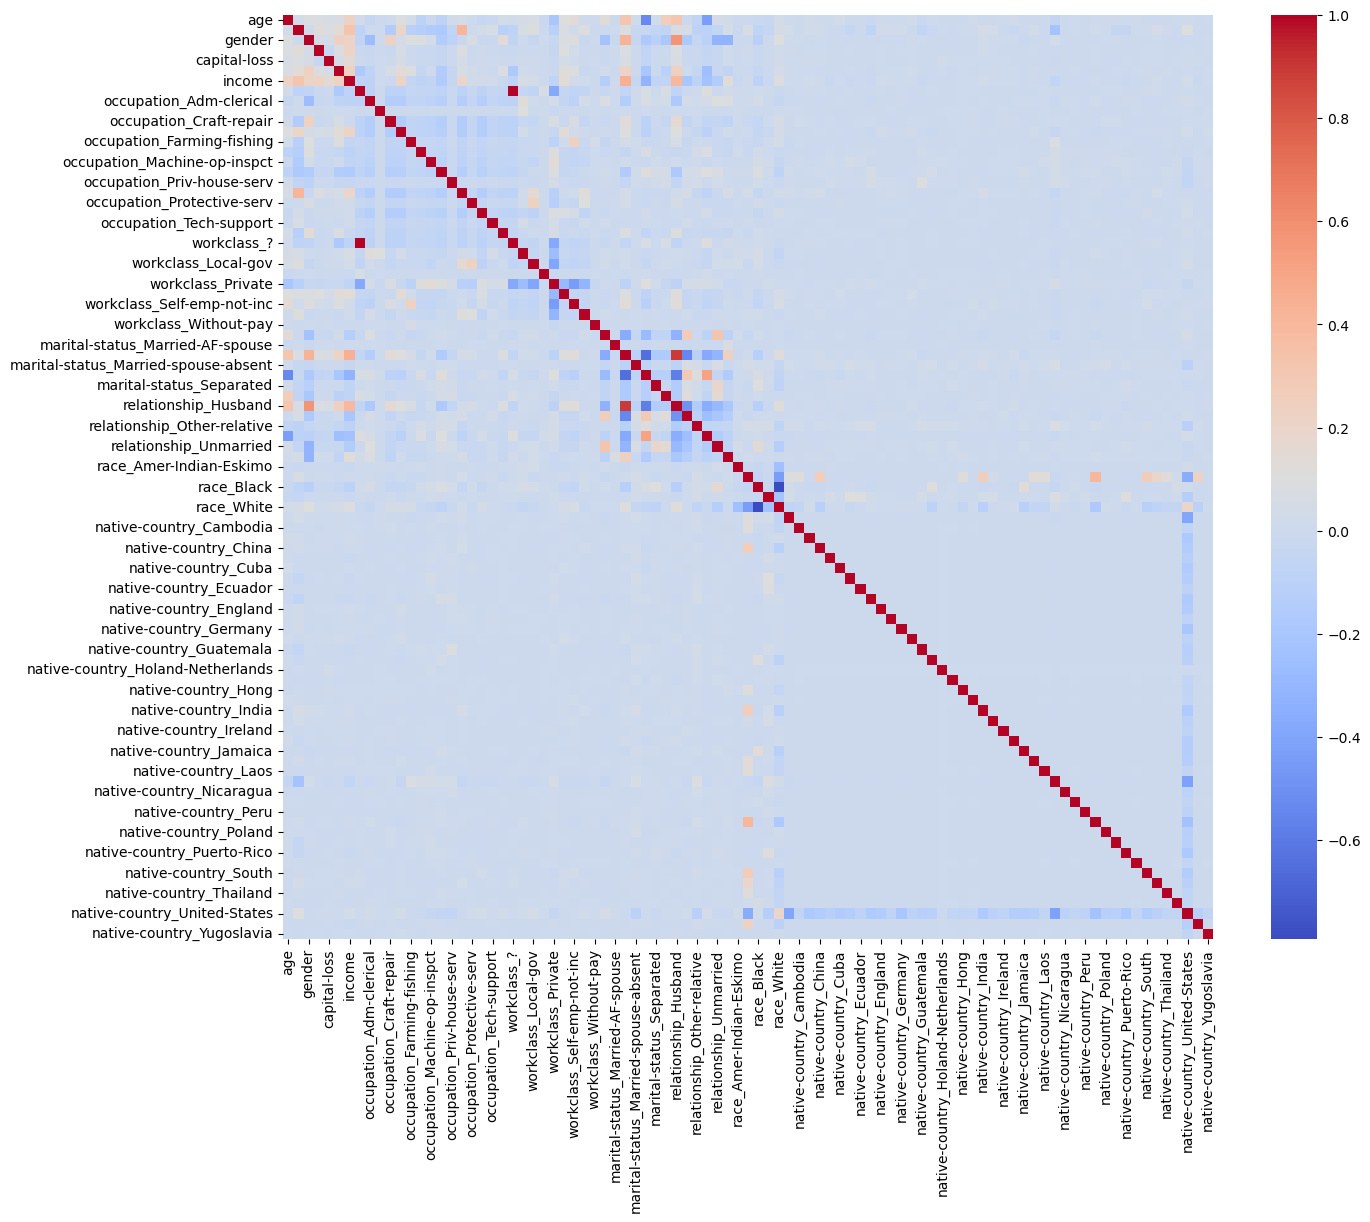

In [11]:
plt.figure(figsize=(15, 12))
sns.heatmap(df.corr(), cmap='coolwarm')

In [12]:
correlations = df.corr()['income'].abs()
sorted_correlations = correlations.sort_values()
num_cols_to_drop = int(0.8*len(df.columns))
cols_to_drop = sorted_correlations.iloc[:num_cols_to_drop].index
df_dropped = df.drop(cols_to_drop, axis=1)

In [13]:
df_dropped

,age,educational-num,gender,capital-gain,capital-loss,hours-per-week,income,occupation_Exec-managerial,occupation_Other-service,occupation_Prof-specialty,workclass_Self-emp-inc,marital-status_Divorced,marital-status_Married-civ-spouse,marital-status_Never-married,relationship_Husband,relationship_Not-in-family,relationship_Own-child,relationship_Unmarried,relationship_Wife
0,25,7,1,0,0,40,0,0,0,0,0,0,0,1,0,0,1,0,0
1,38,9,1,0,0,50,0,0,0,0,0,0,1,0,1,0,0,0,0
2,28,12,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
3,44,10,1,7688,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
4,18,10,0,0,0,30,0,0,0,0,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,12,0,0,0,38,0,0,0,0,0,0,1,0,0,0,0,0,1
48838,40,9,1,0,0,40,1,0,0,0,0,0,1,0,1,0,0,0,0
48839,58,9,0,0,0,40,0,0,0,0,0,0,0,0,0,0,0,1,0
48840,22,9,1,0,0,20,0,0,0,0,0,0,0,1,0,0,1,0,0


<Axes: >

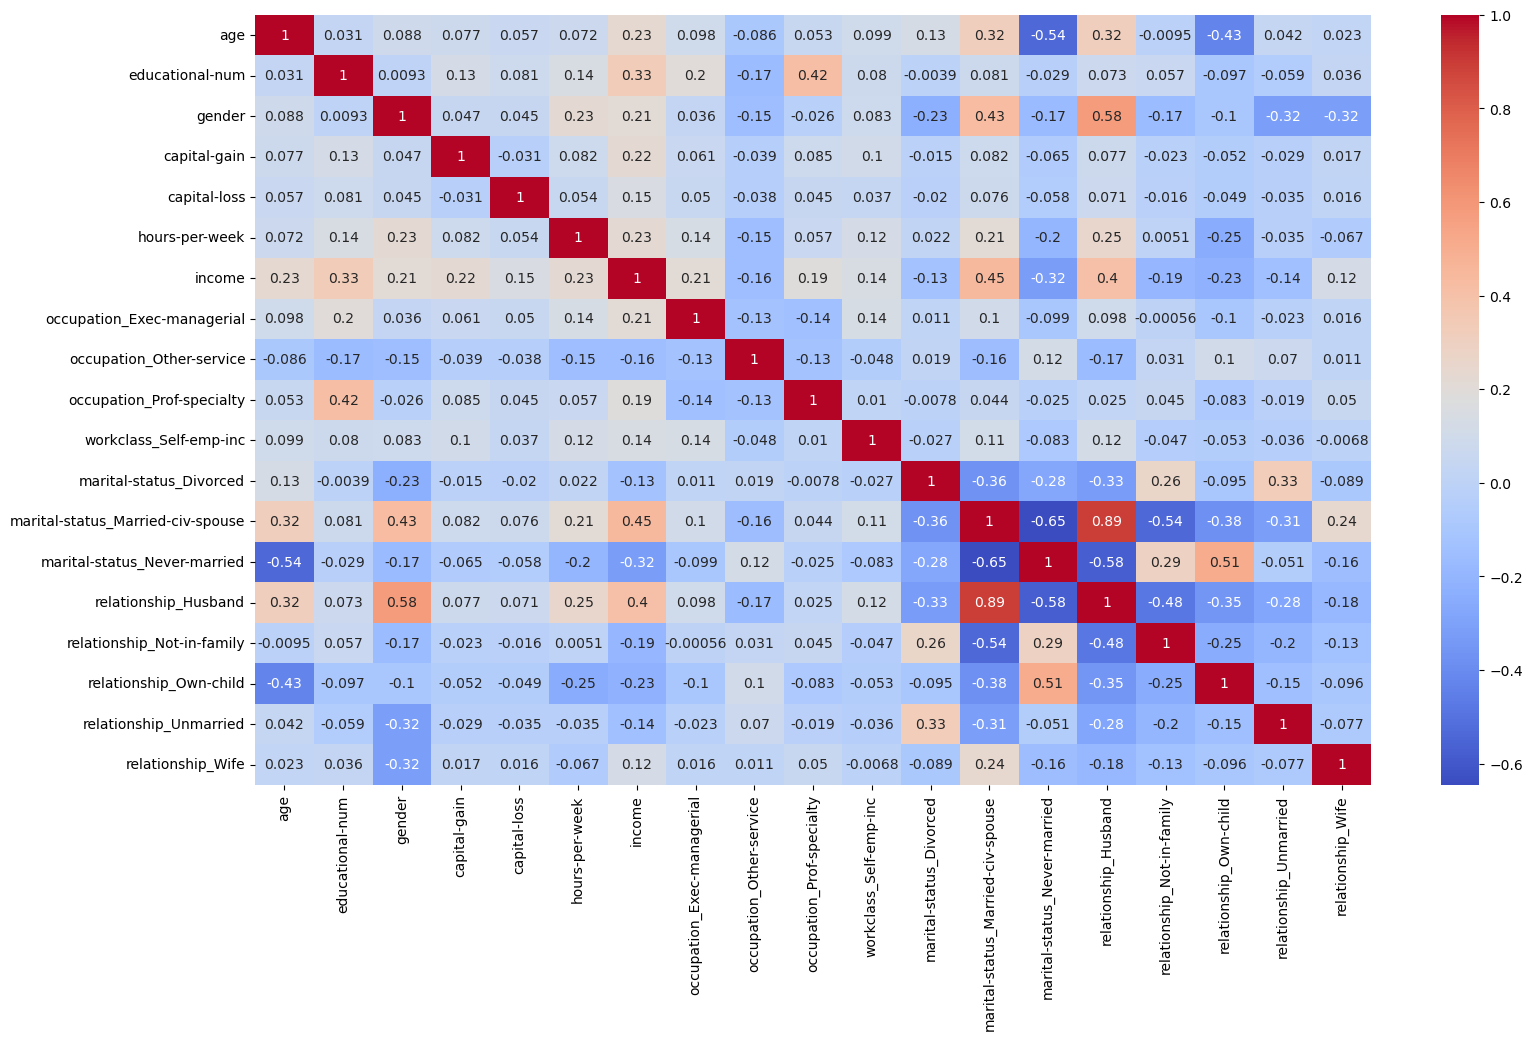

In [14]:
plt.figure(figsize=(18, 10))
sns.heatmap(df_dropped.corr(), annot=True, cmap='coolwarm')

In [15]:
from sklearn.model_selection import train_test_split

X = df_dropped.drop('income', axis=1)
y = df_dropped['income']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [16]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier()

forest.fit(X_train, y_train)

RandomForestClassifier()

In [17]:
forest.score(X_test, y_test)

0.8497287337496161

In [18]:
forest.feature_importances_

array([0.23222442, 0.14525568, 0.01268885, 0.14049403, 0.04478155,
       0.13572329, 0.02405049, 0.0082721 , 0.0196727 , 0.00810389,
       0.0066979 , 0.09467168, 0.02060928, 0.07881078, 0.0068147 ,
       0.00599289, 0.00325847, 0.01187731])

In [19]:
forest.feature_names_in_

array(['age', 'educational-num', 'gender', 'capital-gain', 'capital-loss',
       'hours-per-week', 'occupation_Exec-managerial',
       'occupation_Other-service', 'occupation_Prof-specialty',
       'workclass_Self-emp-inc', 'marital-status_Divorced',
       'marital-status_Married-civ-spouse',
       'marital-status_Never-married', 'relationship_Husband',
       'relationship_Not-in-family', 'relationship_Own-child',
       'relationship_Unmarried', 'relationship_Wife'], dtype=object)

In [20]:
importances = dict(zip(forest.feature_names_in_, forest.feature_importances_))
importances = {k: v for k, v in sorted(importances.items(), key=lambda x: x[1], reverse=True)}

In [21]:
importances

{'age': 0.23222441634976565,
 'educational-num': 0.14525568077625528,
 'capital-gain': 0.14049403418532666,
 'hours-per-week': 0.1357232942726443,
 'marital-status_Married-civ-spouse': 0.09467168150064159,
 'relationship_Husband': 0.0788107750772483,
 'capital-loss': 0.04478155243953443,
 'occupation_Exec-managerial': 0.024050487474274396,
 'marital-status_Never-married': 0.02060927546253985,
 'occupation_Prof-specialty': 0.019672700181072856,
 'gender': 0.012688850890998747,
 'relationship_Wife': 0.011877307195022098,
 'occupation_Other-service': 0.008272100725721746,
 'workclass_Self-emp-inc': 0.00810389156827579,
 'relationship_Not-in-family': 0.006814695258480243,
 'marital-status_Divorced': 0.00669790296592359,
 'relationship_Own-child': 0.005992888548068296,
 'relationship_Unmarried': 0.003258465128206222}

In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 30, None],
    'min_samples_split': [2, 4],
    'max_features': ['sqrt', 'log2']
}
grid_search = GridSearchCV(estimator= RandomForestClassifier(),
                          param_grid=param_grid, verbose=10)

In [23]:
grid_search.fit(X_train, y_train )

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 1/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.847 total time=   2.7s
[CV 2/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 2/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.855 total time=   2.8s
[CV 3/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 3/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.858 total time=   2.8s
[CV 4/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100
[CV 4/5; 1/48] END max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators=100;, score=0.848 total time=   2.9s
[CV 5/5; 1/48] START max_depth=5, max_features=sqrt, min_samples_split=2, n_estimators

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 30, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             verbose=10)

In [24]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, min_samples_split=4)

In [25]:
forest = grid_search.best_estimator_

In [26]:
forest.score(X_test, y_test)

0.8661070733954346